# **Spam Classifier Task (The Pre-Internship Task from BizAnalytix Technologies Pvt Ltd.)**

### **By Deepak Kaura**

## **About Task :**


In this task, Can you use this unstructured text dataset to build a prediction model that will accurately classify which texts are spam? 

With the help of NLP (means Natural Language Processing) it should be meaningful and logical. On overall basis it should be ease to understand.




## **Importing Libraries**

In [9]:
import numpy as np 
import pandas as pd
import plotly.express as px
import nltk
import matplotlib.pyplot as plt
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
import regex as re
nltk.download('wordnet')
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Reading Data**

In [2]:
df_email = pd.read_csv('emails.csv')

df_email.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [10]:
df_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## **Checking missing value**

In [11]:
df_email.isnull().sum()

text    0
spam    0
dtype: int64

## **Checking counts of spams and non-spams**

In [12]:
df_email['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [13]:
df= df_email['spam'].value_counts()
fig = px.bar(df,hover_data=[df.index],width=500,height = 300)
fig.update_traces(marker_color='rgb(3, 252, 236)', marker_line_color='rgb(3, 140, 252)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title='Spam 0 or Not Spam 1')
fig.show()

**From the above graph we observed that there are lot of spams present in this unstructured text data.**

## **Preprocessing**

#### **Removing Punctutaion**

In [14]:
def remove_punctuation(text):
    no_punct="".join([words for words in text if words not in string.punctuation])
    return no_punct
df_email["text"] = df_email['text'].apply(lambda x: remove_punctuation(x))
df_email.head()

,text,spam
0,Subject naturally irresistible your corporate ...,1
1,Subject the stock trading gunslinger fanny is...,1
2,Subject unbelievable new homes made easy im w...,1
3,Subject 4 color printing special request addi...,1
4,Subject do not have money get software cds fr...,1


#### **Removing Stopwords**

In [15]:
stopword = set(stopwords.words('english'))
stopword.add('Subject')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword])
df_email['text'] = df_email['text'].apply(lambda x: remove_stopwords(x))
df_email.head()

,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy im wanting sh...,1
3,4 color printing special request additional in...,1
4,money get software cds software compatibility ...,1


#### **Tokenization is the process of breaking text into smaller pieces called tokens. These smaller pieces can be sentences, words, or sub-words.**

In [16]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split
df_email['text']=df_email['text'].apply(lambda x: tokenize(x.lower()))
df_email.head()

,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[money, get, software, cds, software, compatib...",1


#### **Lemmatizing is the process of reducing a word to its root form.**

In [17]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])

df_email['text'] = df_email["text"].apply(lambda text: lemmatize_words(text))
df_email.head()

,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new home made easy im wanting sho...,1
3,4 color printing special request additional in...,1
4,money get software cd software compatibility g...,1


### **Splitting the data according to spam and non-spam**

In [18]:
spam = " ".join(df_email[df_email['spam'] == 1]['text'].tolist())
non_spam = " ".join(df_email[df_email['spam'] == 0]['text'].tolist())

### **Finding most repeated words in the data**

In [19]:
def return_top_words(text,words = 10):
    allWords = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

In [20]:
top_10_spam = return_top_words(spam,10)
top_10_non_spam = return_top_words(non_spam,10)

In [21]:
top_10_spam

['company',
 'com',
 '1',
 'business',
 'email',
 'information',
 'e',
 'u',
 '5',
 'money']

In [22]:
top_10_non_spam

['enron',
 'ect',
 'vince',
 'hou',
 '2000',
 'kaminski',
 'com',
 'please',
 'subject',
 'would']

## **WordCloud**

In [23]:
stopwords = set(STOPWORDS)

for val in df_email.text: 

    val = str(val) 
    tokens = val.split()

    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(spam) 

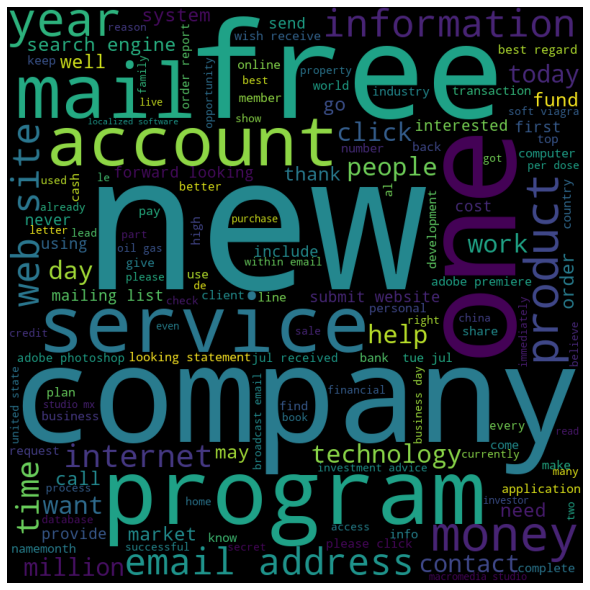

In [24]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [25]:
stopwords = set(STOPWORDS) 

for val in df_email.text:

    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(non_spam)

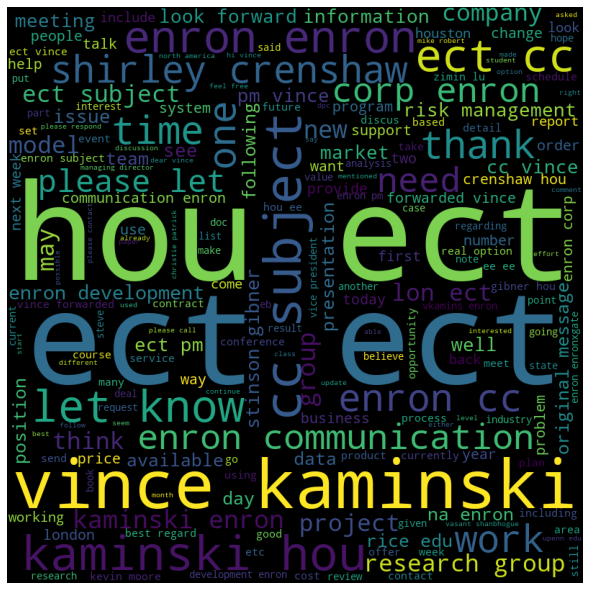

In [26]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## **Data Modeling**

In [27]:
X = df_email['text']
y = df_email['spam']

### **TF-IDF (Term Frequency - Inverse Document Frequency)**

In [28]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X_ct  = vectorizer.transform(X)

## **Splitting the data**

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_ct,y,test_size=0.2,random_state=42)

## **Checking the lenght of the train and test**

In [30]:
X_train.shape

(4582, 34579)

In [31]:
y_train.shape

(4582,)

In [32]:
X_test.shape

(1146, 34579)

In [33]:
y_test.shape

(1146,)

### **Random Forest**

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

accuracy score is:  0.9738219895287958
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       856
           1       1.00      0.90      0.95       290

    accuracy                           0.97      1146
   macro avg       0.98      0.95      0.96      1146
weighted avg       0.97      0.97      0.97      1146



### **XGBoost**

In [35]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred2 = xg.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

accuracy score is:  0.9677137870855148
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       856
           1       0.91      0.97      0.94       290

    accuracy                           0.97      1146
   macro avg       0.95      0.97      0.96      1146
weighted avg       0.97      0.97      0.97      1146



## **Observation of the above two models :**



From above 2 models we can observe that both have almost similar accuracy i.e Random Forest :- 97% accuracy and  XGBoost :- 97%(approx) accuracy.
 It's tough to decide whom to choose accuracy wise but in terms of identify spams which model found maximum we will check on Precision accuracy of the above 2 models and also this will help us to understand which model to choose as our final answer, Random Forest have 100% accuracy in Precision as compared to XGBoost, so I will go with Random Forest as my final model selection in terms of checking spams detection.